## Random Forest w/ "Bioresponse" Data Set

In [1]:
import numpy as np
import matplotlib as plt
import pandas as pd
import matplotlib.pyplot as pltt

## Decision Tree:

Откроем наш датасет "bioresponse.csv":

In [3]:
df = pd.read_csv("bioresponse.csv")
df

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3746,1,0.033300,0.506409,0.10,0.0,0.209887,0.633426,0.297659,0.376124,0.727093,...,0,0,0,0,0,0,0,0,0,0
3747,1,0.133333,0.651023,0.15,0.0,0.151154,0.766505,0.170876,0.404546,0.787935,...,0,0,1,0,1,0,1,0,0,0
3748,0,0.200000,0.520564,0.00,0.0,0.179949,0.768785,0.177341,0.471179,0.872241,...,0,0,0,0,0,0,0,0,0,0
3749,1,0.100000,0.765646,0.00,0.0,0.536954,0.634936,0.342713,0.447162,0.672689,...,0,0,0,0,0,0,0,0,0,0


Так как для работы нам нужно использовать столбцы "D1"-"D3", то сбросим ненужные столбцы при помощи ".iloc[ ]":

In [22]:
df = df.drop(df.iloc[:, 3:], axis = 1)

Посмотрим, что получилось:

In [23]:
df

,Activity,D1,D2
0,1,0.000000,0.497009
1,1,0.366667,0.606291
2,1,0.033300,0.480124
3,1,0.000000,0.538825
4,0,0.100000,0.517794
...,...,...,...
3746,1,0.033300,0.506409
3747,1,0.133333,0.651023
3748,0,0.200000,0.520564
3749,1,0.100000,0.765646


In [24]:
np.random.seed(42)

Разделим наши данные на тестовые и тренировочные:

In [25]:
X_train = df.drop(["Activity"], axis = 1)[:2500].values
Y_train = df["Activity"][:2500]

X_test = df.drop(["Activity"], axis = 1)[2500:].values
Y_test = df["Activity"][2500:]

print("X_train shape:{}".format(X_train.shape))
print("Y_train shape: {}".format(Y_train.shape))

print("X_test shape: {}".format(X_test.shape))
print("Y_test shape: {}".format(Y_test.shape))

X_train shape:(2500, 2)
Y_train shape: (2500,)
X_test shape: (1251, 2)
Y_test shape: (1251,)


Импортируем "RandomForestClassifier", чтобы строить дерево принятия решений и обучим модель на тренировочных данных:

In [26]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 50, max_depth = 20, random_state = 5)
z = clf.fit(X_train, Y_train)

Проверим точность алгоритма на тестовых данных:

In [27]:
from sklearn.metrics import accuracy_score
Y_pred = clf.predict(X_test)
accuracy_score(Y_pred, Y_test)

0.6147082334132694

А теперь проверим на тренировочных:

In [28]:
Y_pred = clf.predict(X_train)
accuracy_score(Y_pred, Y_train)

0.908

Визуализируем наши данные в виде "Meshgrid":

In [29]:
h = 0.01
x_min, x_max = X_train[:, 0].min()-1, X_train[:, 0].max()+1
y_min, y_max = X_train[:, 1].min()-1, X_train[:, 1].max()+1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Построим график:

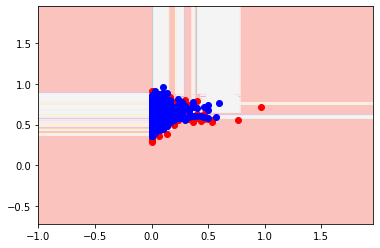

In [30]:
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]) 
Z = Z.reshape(xx.shape)
pltt.plot(X_train[Y_train == 0][:, 0], X_train[Y_train == 0][:, 1], 'ro')
pltt.plot(X_train[Y_train == 1][:, 0], X_train[Y_train == 1][:, 1], 'bo')
pltt.plot(X_train[Y_train == 2][:, 0], X_train[Y_train == 2][:, 1], 'yo')
pltt.contourf(xx, yy, Z, cmap=plt.cm.Pastel1, alpha=0.8)

## Gradient Boosting

Импортируем "xgboost", чтобы начать работу:

In [35]:
import xgboost as xg

Создадим "XGBClassifier":

In [36]:
grboost = xg.XGBClassifier(n_estimators = 150, max_depth = 5, random_state = 1)

Обучим нашу модель:

In [37]:
grboost.fit(X_train, Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=150, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=1, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

Посмтроим график для получившихся данных:

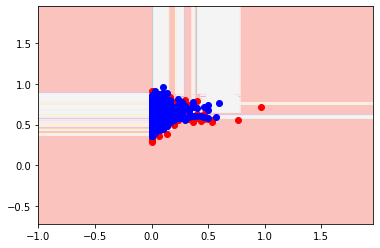

In [38]:
V = grboost.predict(np.c_[xx.ravel(), yy.ravel()]) 
Z = Z.reshape(xx.shape)
pltt.plot(X_train[Y_train == 0][:, 0], X_train[Y_train == 0][:, 1], 'ro')
pltt.plot(X_train[Y_train == 1][:, 0], X_train[Y_train == 1][:, 1], 'bo')
pltt.plot(X_train[Y_train == 2][:, 0], X_train[Y_train == 2][:, 1], 'yo')
pltt.contourf(xx, yy, Z, cmap=plt.cm.Pastel1, alpha=0.8)